# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
#Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error,mean_squared_error,r2_score , roc_auc_score


# Loading The datasets

In [ ]:
# Load the training and testing datasets
train_data = pd.read_csv("customer_churn_dataset-training-master.csv")
test_data = pd.read_csv("customer_churn_dataset-testing-master.csv")

In [ ]:
# first 10 rows in training datasets
train_data.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
5,8.0,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1.0
6,9.0,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1.0
7,10.0,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.0,30.0,1.0
8,11.0,39.0,Male,12.0,5.0,7.0,4.0,Standard,Quarterly,969.0,13.0,1.0
9,12.0,64.0,Female,3.0,25.0,2.0,11.0,Standard,Quarterly,415.0,29.0,1.0


In [ ]:
# first 10 rows in testing datasets
test_data.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
5,6,30,Male,41,14,10,10,Premium,Monthly,500,29,0
6,7,47,Female,37,15,9,28,Basic,Quarterly,574,14,1
7,8,54,Female,36,11,0,18,Standard,Monthly,323,16,0
8,9,36,Male,20,5,10,8,Basic,Monthly,687,8,0
9,10,65,Male,8,4,2,23,Basic,Annual,995,10,0


In [ ]:
# last 10 rows in traning datasetst
train_data.tail(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
440823,449990.0,48.0,Male,11.0,27.0,1.0,18.0,Standard,Annual,618.28,5.0,0.0
440824,449991.0,41.0,Male,46.0,25.0,3.0,2.0,Standard,Quarterly,619.79,15.0,0.0
440825,449992.0,41.0,Male,27.0,20.0,2.0,12.0,Standard,Quarterly,634.17,27.0,0.0
440826,449993.0,49.0,Male,37.0,23.0,4.0,16.0,Standard,Annual,666.65,30.0,0.0
440827,449994.0,45.0,Male,6.0,25.0,2.0,15.0,Basic,Annual,837.00,2.0,0.0
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0
440832,449999.0,31.0,Male,48.0,20.0,1.0,14.0,Premium,Quarterly,567.77,21.0,0.0


In [ ]:
# last 10 rows in testing datasetst
test_data.tail(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
64364,64365,48,Female,36,22,4,22,Premium,Annual,342,9,1
64365,64366,26,Female,54,24,2,21,Basic,Annual,165,23,1
64366,64367,64,Male,30,27,9,28,Premium,Annual,884,21,1
64367,64368,51,Male,47,17,10,26,Basic,Annual,544,24,1
64368,64369,45,Male,3,1,5,11,Standard,Annual,218,15,1
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1
64373,64374,52,Female,45,15,9,25,Standard,Monthly,696,22,1


In [ ]:
# Display dataset shape
print("Training Data Shape:", train_data.shape)
print("Testing Data Shape:", test_data.shape)

Training Data Shape: (440833, 12)
Testing Data Shape: (64374, 12)


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [ ]:
# Display basic statistics of training datasets
train_data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [ ]:
# Display basic statistics of testing datasets
test_data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [ ]:
# Check how many duplicate rows exist in the dataset
train_data.duplicated().sum()
test_data.duplicated().sum()
print("Number of duplicate rows in training datasets:", train_data.duplicated().sum())
print("Number of duplicate rows in testing datasets:", train_data.duplicated().sum())

Number of duplicate rows in training datasets: 0
Number of duplicate rows in testing datasets: 0


In [ ]:
# Check for missing values in both datasets
print("\nMissing Values in Training Data:")
print(train_data.isnull().sum())

print("\nMissing Values in Testing Data:")
print(test_data.isnull().sum())


Missing Values in Training Data:
CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

Missing Values in Testing Data:
CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [ ]:
# Drop rows with missing values in the training data
train_data.dropna(inplace=True)

# Verify that missing values are removed
print("\nMissing Values in Training Data After Cleaning:")
print(train_data.isnull().sum())



Missing Values in Training Data After Cleaning:
CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [ ]:
# Convert Churn to integer
train_data["Churn"] = train_data["Churn"].astype(int)

# Drop CustomerID column
train_data.drop(columns=["CustomerID"], inplace=True)
test_data.drop(columns=["CustomerID"], inplace=True)

# Verify changes
print("\nUpdated Data Types in Training Data:")
print(train_data.dtypes)


Updated Data Types in Training Data:
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                  int64
dtype: object


In [ ]:
train_data['Churn'].value_counts()

,count
Churn,
1,249999
0,190833


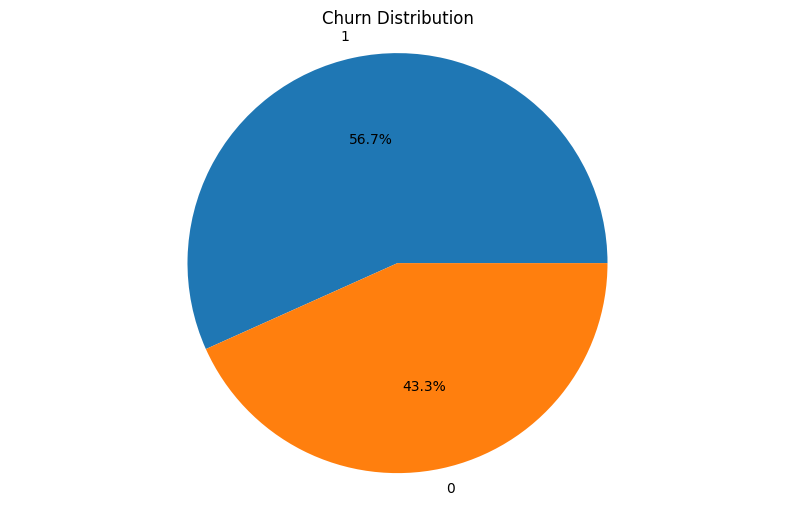

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(train_data['Churn'].value_counts(), labels=train_data['Churn'].value_counts().index, autopct='%1.1f%%')
plt.title('Churn Distribution')
plt.axis('equal')
plt.show()

## Visualization

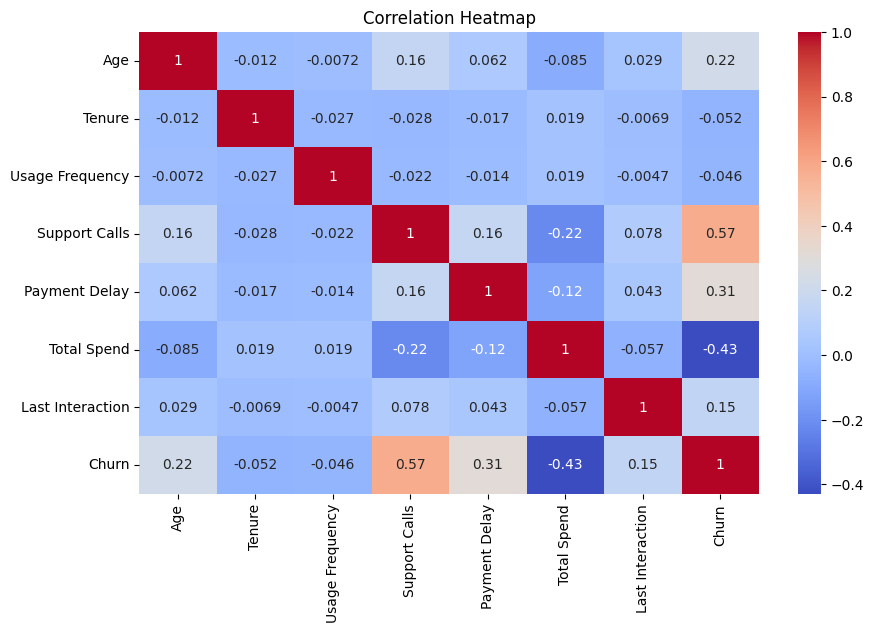

In [ ]:
# Heatmap for numeric features
plt.figure(figsize=(10,6))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

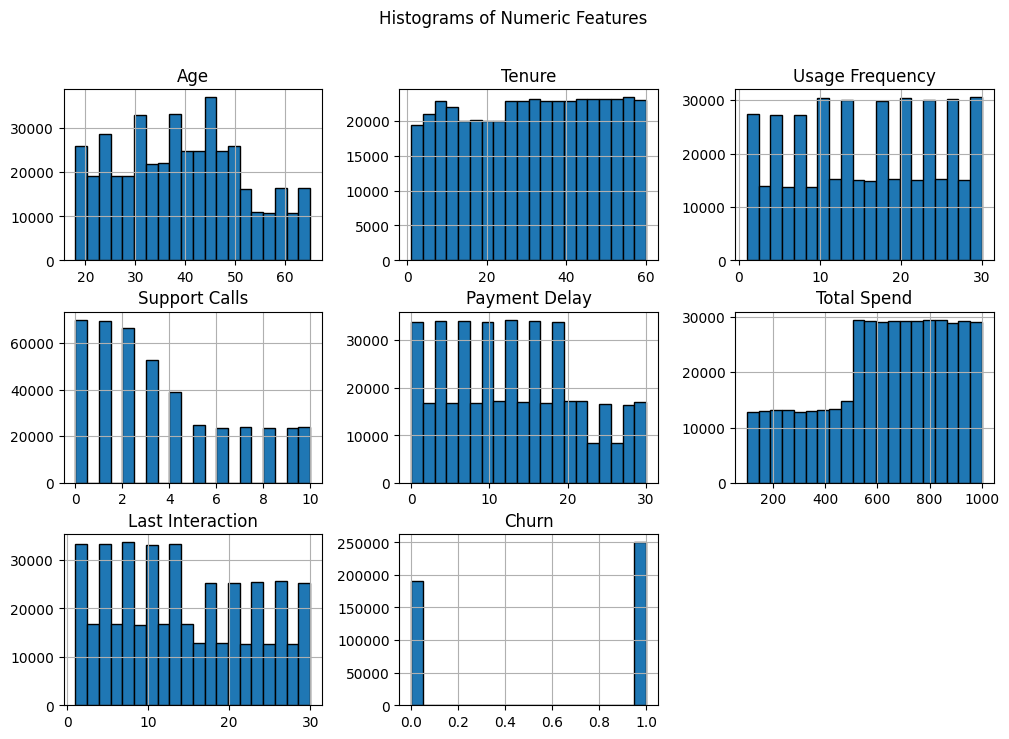

In [ ]:
# Histograms for numeric features
train_data.hist(figsize=(12,8), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numeric Features")
plt.show()

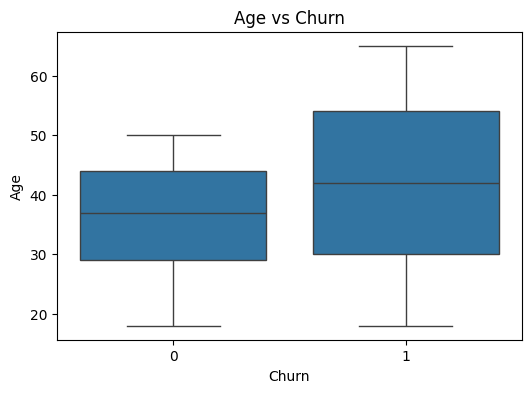

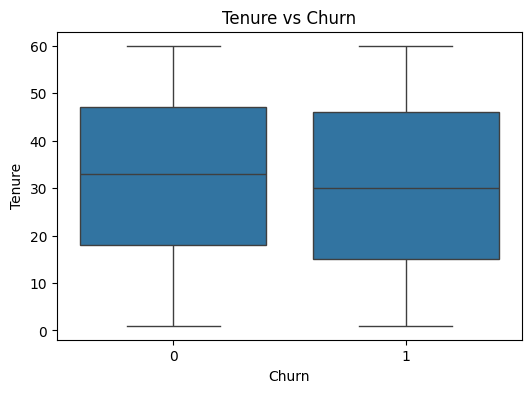

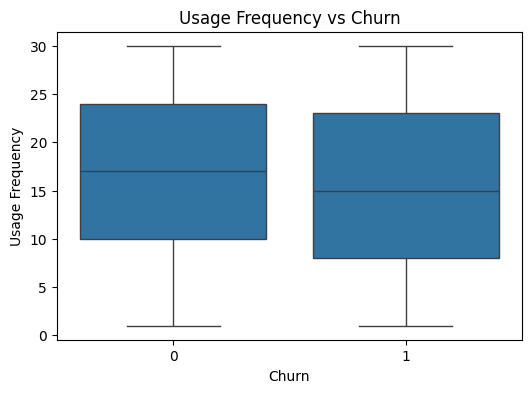

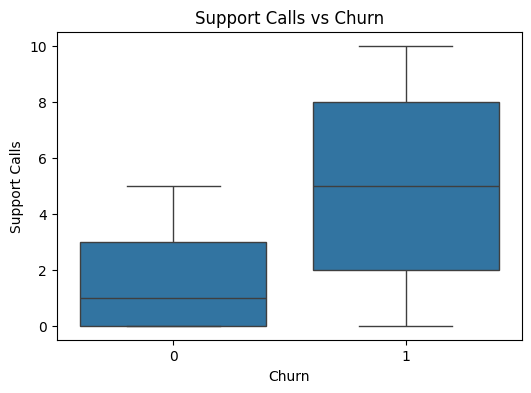

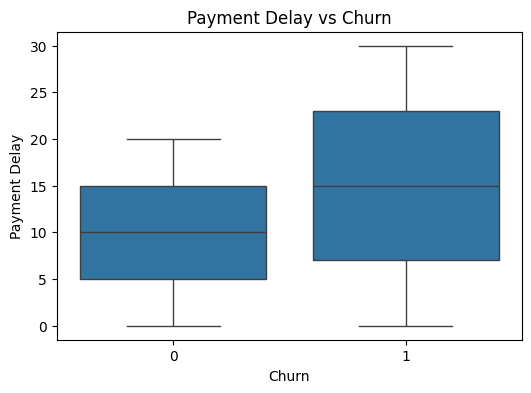

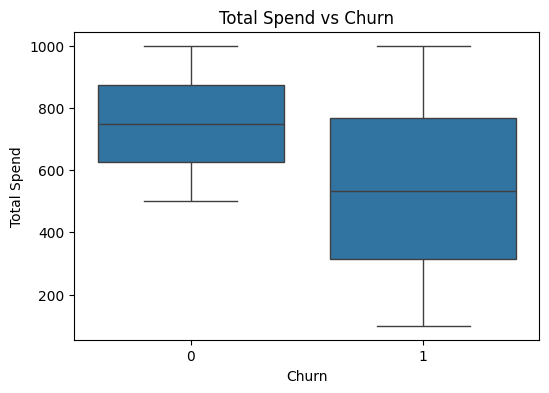

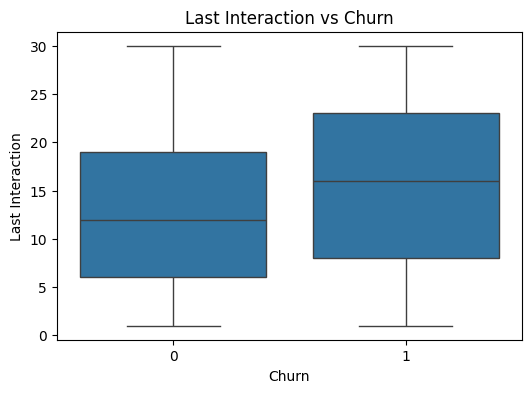

In [ ]:
# Boxplots for numeric vs Target (Churn)
numeric_cols = train_data.select_dtypes(include=[np.number]).columns.drop('Churn')

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Churn", y=col, data=train_data)
    plt.title(f"{col} vs Churn")
    plt.show()

In [ ]:
# apply loop check unique value without int or float in dataset
for col in train_data.columns:
    if train_data[col].dtype != 'int64' and train_data[col].dtype != 'float64':
        print(f'{col} : {train_data[col].unique()}')

Gender : ['Female' 'Male']
Subscription Type : ['Standard' 'Basic' 'Premium']
Contract Length : ['Annual' 'Monthly' 'Quarterly']


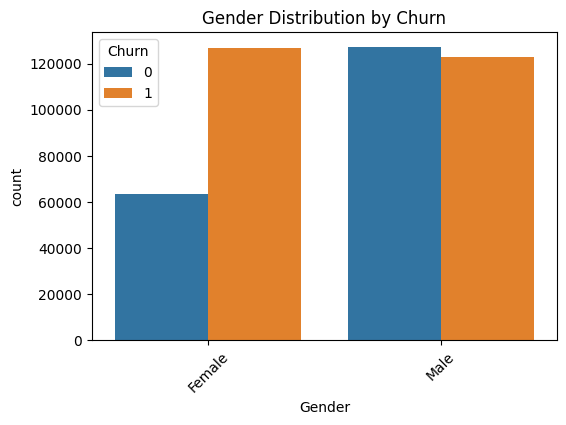

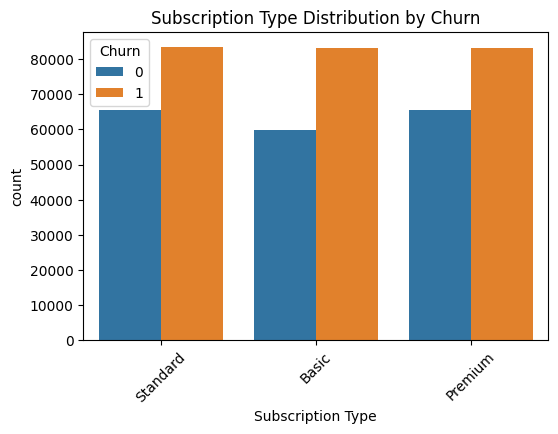

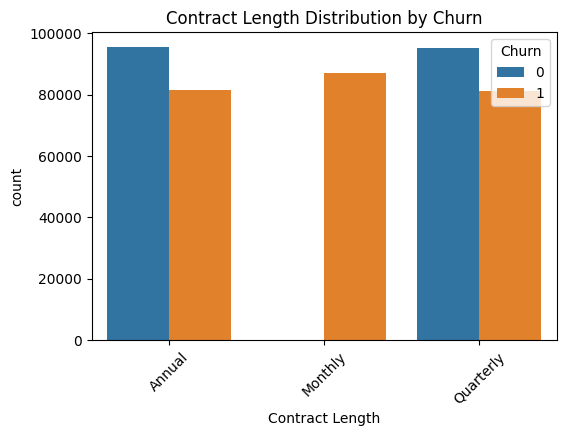

In [ ]:
# Countplots for categorical features

cat_cols = train_data.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue="Churn", data=train_data)
    plt.title(f"{col} Distribution by Churn")
    plt.xticks(rotation=45)
    plt.show()

##Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

def encode_columns(train_df, test_df, categorical_cols):
    encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        train_df[col] = le.fit_transform(train_df[col])
        test_df[col] = le.transform(test_df[col])
        encoders[col] = le
    return train_df, test_df, encoders

categorical_cols = ["Gender", "Subscription Type", "Contract Length"]

train_data, test_data, encoders = encode_columns(train_data, test_data, categorical_cols)

# Verify encoding
train_data.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1
1,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1
2,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1
3,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1
4,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1


In [ ]:
 # split data into X and y
X = train_data.drop('Churn', axis=1)
y = train_data['Churn']


In [ ]:
X.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0
1,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0
2,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0
3,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0
4,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0


In [ ]:
y.head()

,Churn
0,1
1,1
2,1
3,1
4,1


## Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, shuffle = True)
print("x_train shape : ",X_train.shape)
print("x_test shape : ",X_test.shape)
print("y_train shape : ",y_train.shape)
print("y_test shape : ",y_test.shape)

x_train shape :  (352665, 10)
x_test shape :  (88167, 10)
y_train shape :  (352665,)
y_test shape :  (88167,)


In [ ]:
# Handling imbalanced training data using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)





In [ ]:
# Check the class distribution after applying SMOTE on the training set
value_counts = y_train_res.value_counts()
value_counts

,count
Churn,
0,199895
1,199895


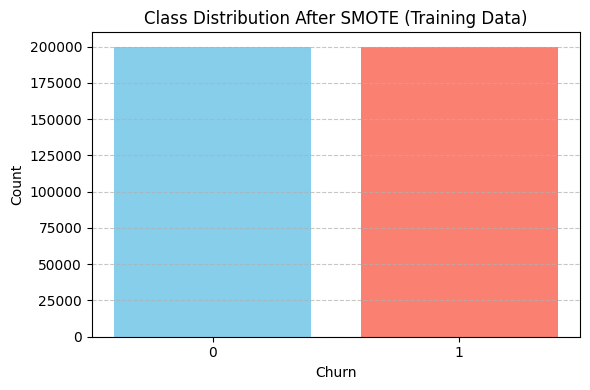

In [ ]:
# Visualization after SMOTE
plt.figure(figsize=(6, 4))
plt.bar(value_counts.index.astype(str), value_counts.values, color=['skyblue', 'salmon'])
plt.title("Class Distribution After SMOTE (Training Data)")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##

## Feature Scaling

In [ ]:
# Numerical features for scaling
numerical_features = ["Age", "Tenure", "Usage Frequency", "Support Calls",
                      "Payment Delay", "Total Spend", "Last Interaction"]

# Initialize scaler
scaler = StandardScaler()

# Fit on training data (after SMOTE) & transform
X_train_res[numerical_features] = scaler.fit_transform(X_train_res[numerical_features])

# Transform test split (evaluation)
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Transform inference dataset (unseen data)
test_data[numerical_features] = scaler.transform(test_data[numerical_features])

# Show first 5 rows
X_train_res.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,-1.236067,1,1.545283,1.419001,-1.128698,-1.069433,0,0,0.084203,1.718929
1,-1.236067,1,-0.312636,-0.451677,-0.793256,1.658347,0,2,0.462446,-0.268845
2,-1.730601,1,0.267964,-0.919347,-1.128698,-0.697463,1,2,0.883635,-0.619628
3,-0.246999,0,-0.777116,-0.802429,-0.457814,1.286377,1,1,0.479488,-1.321195
4,1.483870,0,-0.254576,1.185166,1.554835,0.294457,0,1,0.181256,-0.502700


## Build Models

In [ ]:
accuracies = {}

## LogisticRegression

In [ ]:
# Train the model
lr = LogisticRegression()
lr.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred_lr = lr.predict(X_test)

# Calculate accuracy using y_pred and y_test
acc = accuracy_score(y_test, y_pred_lr) * 100
accuracies['Logistic Regression'] = acc

# Print results
print("Test Accuracy {:.2f}%".format(acc))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_lr))

Test Accuracy 85.19%

Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.89      0.84     38063
           1       0.91      0.83      0.86     50104

    accuracy                           0.85     88167
   macro avg       0.85      0.86      0.85     88167
weighted avg       0.86      0.85      0.85     88167



## K Neighbors Classifier Model

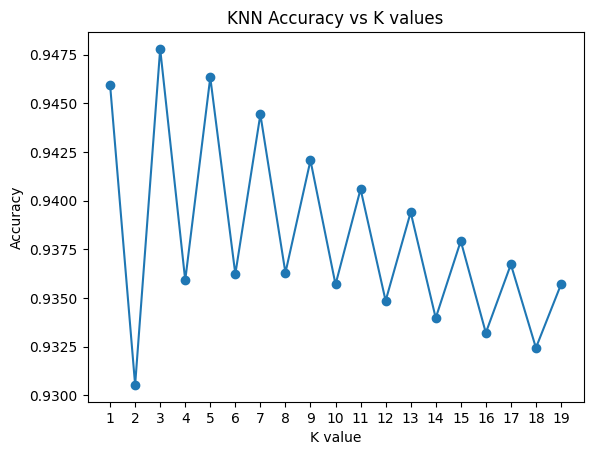

Best K value is: 3
Test Accuracy with Best K: 94.78%

Classification Report:

              precision    recall  f1-score   support

           0       0.90      1.00      0.94     38063
           1       1.00      0.91      0.95     50104

    accuracy                           0.95     88167
   macro avg       0.95      0.95      0.95     88167
weighted avg       0.95      0.95      0.95     88167



In [ ]:
# List to store accuracy scores for different K values
scoreList = []

# Try K values from 1 to 19
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)  # n_neighbors = K
    knn.fit(X_train_res, y_train_res)
    scoreList.append(knn.score(X_test, y_test))

# Plot accuracy vs K values
plt.plot(range(1, 20), scoreList, marker="o")
plt.xticks(np.arange(1, 20, 1))
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K values")
plt.show()

# Get the best K value
best_k = np.argmax(scoreList) + 1   # +1 because index starts at 0

# Train final model with the best K
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_res, y_train_res)

# Predict with the best model
y_pred_best_knn = best_knn.predict(X_test)

# Calculate accuracy
acc_knn = accuracy_score(y_test, y_pred_best_knn) * 100
accuracies['KNN'] = acc_knn

# Print results
print("Best K value is:", best_k)
print("Test Accuracy with Best K: {:.2f}%".format(acc_knn))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_best_knn))

## Support Vector Machine (SVM) Model

In [ ]:
# Train the model
svc = SVC()
svc.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred_svc = svc.predict(X_test)

# Calculate accuracy
acc_svc = accuracy_score(y_test, y_pred_svc) * 100
accuracies['SVC'] = acc_svc

# Print results
print(f"Test Accuracy of SVC Algorithm: {acc_svc:.2f}%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_svc))


Test Accuracy of SVC Algorithm: 96.98%

Classification Report:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     38063
           1       1.00      0.95      0.97     50104

    accuracy                           0.97     88167
   macro avg       0.97      0.97      0.97     88167
weighted avg       0.97      0.97      0.97     88167



## Gaussian NB Model

In [ ]:
# Train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred_nb = nb.predict(X_test)

# Calculate accuracy
acc_nb = accuracy_score(y_test, y_pred_nb) * 100
accuracies['Naive Bayes'] = acc_nb

# Print results
print(f"Accuracy of Naive Bayes: {acc_nb:.2f}%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_nb))

Accuracy of Naive Bayes: 90.58%

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     38063
           1       0.96      0.87      0.91     50104

    accuracy                           0.91     88167
   macro avg       0.90      0.91      0.91     88167
weighted avg       0.91      0.91      0.91     88167



## Decision Tree Classifier Model

In [ ]:
# Train the model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred_dt = dt.predict(X_test)

# Calculate accuracy
acc_dt = accuracy_score(y_test, y_pred_dt) * 100
accuracies['Decision Tree'] = acc_dt

# Print results
print(f"Decision Tree Test Accuracy: {acc_dt:.2f}%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_dt))

Decision Tree Test Accuracy: 99.62%

Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     38063
           1       1.00      0.99      1.00     50104

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



## Random Forest Classifier Model

In [ ]:
# Train the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Calculate accuracy
acc_rf = accuracy_score(y_test, y_pred_rf) * 100
accuracies['Random Forest'] = acc_rf

# Print results
print(f"Random Forest Algorithm Accuracy Score: {acc_rf:.2f}%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))

Random Forest Algorithm Accuracy Score: 99.62%

Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     38063
           1       1.00      0.99      1.00     50104

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



## All Models Accuracy

In [ ]:
# Define models
trained_models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=best_k),
    "Support Vector Machine": SVC(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Train all models
for name, model in trained_models.items():
    model.fit(X_train_res, y_train_res)

print("All models have been trained and stored in trained_models")

# Evaluation
results = []
for name, model in trained_models.items():
    y_train_pred = model.predict(X_train_res)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train_res, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    results.append({
        "Algorithm": name,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Sort by best Test Accuracy
print(results_df.sort_values(by="Test Accuracy", ascending=False))


All models have been trained and stored in trained_models
                Algorithm  Train Accuracy  Test Accuracy
4           Decision Tree        1.000000       0.996246
5           Random Forest        1.000000       0.996234
2  Support Vector Machine        0.970547       0.969751
1     K-Nearest Neighbors        0.969667       0.947792
3    Gaussian Naive Bayes        0.913522       0.905815
0     Logistic Regression        0.856995       0.851940


## Over fitting test

In [ ]:
gap = train_acc - test_acc
if gap > 0.15:
    print(f"\n Clear overfitting detected (gap = {gap:.4f})")
elif gap > 0.05:
    print(f"\n Possible overfitting (gap = {gap:.4f})")
else:
    print("\n Model is balanced, no significant overfitting")


 Model is balanced, no significant overfitting


## Comparing Models

/tmp/ipython-input-2628372161.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)


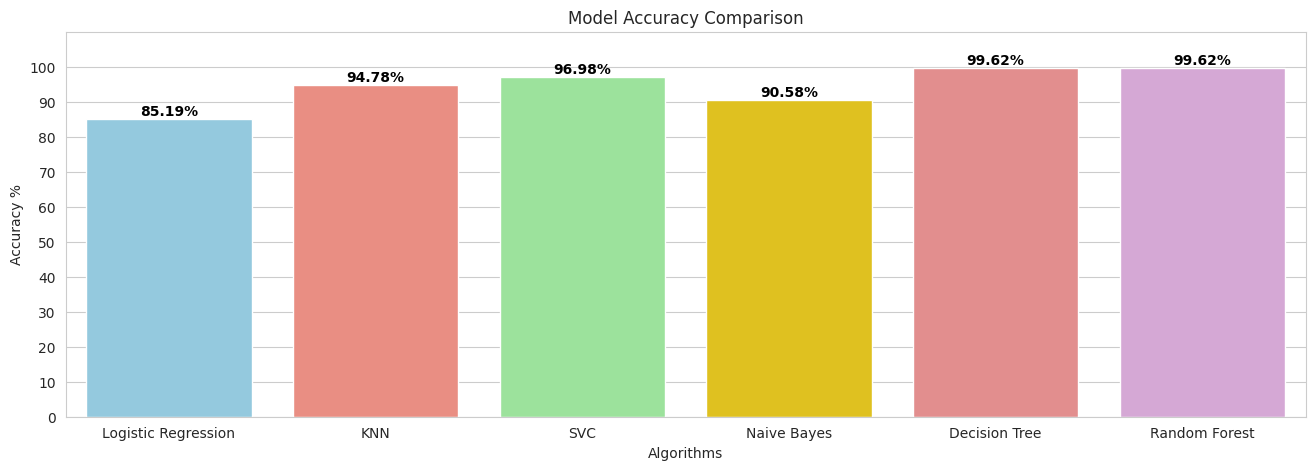

In [ ]:
colors = ["skyblue", "salmon", "lightgreen", "gold", "lightcoral", "plum"]

sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 110, 10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")


ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)


for i, v in enumerate(accuracies.values()):
    ax.text(i, v + 1, f"{v:.2f}%", color='black', ha='center', fontweight='bold')

plt.title("Model Accuracy Comparison")
plt.ylim(0, 110)
plt.show()


## Confusion Matrix

In [ ]:
cm_lr = confusion_matrix(y_test,y_pred_lr)
cm_best_knn = confusion_matrix(y_test,y_pred_best_knn)
cm_svc = confusion_matrix(y_test,y_pred_svc)
cm_nb = confusion_matrix(y_test,y_pred_nb)
cm_dtc = confusion_matrix(y_test,y_pred_dt)
cm_rf = confusion_matrix(y_test,y_pred_rf)

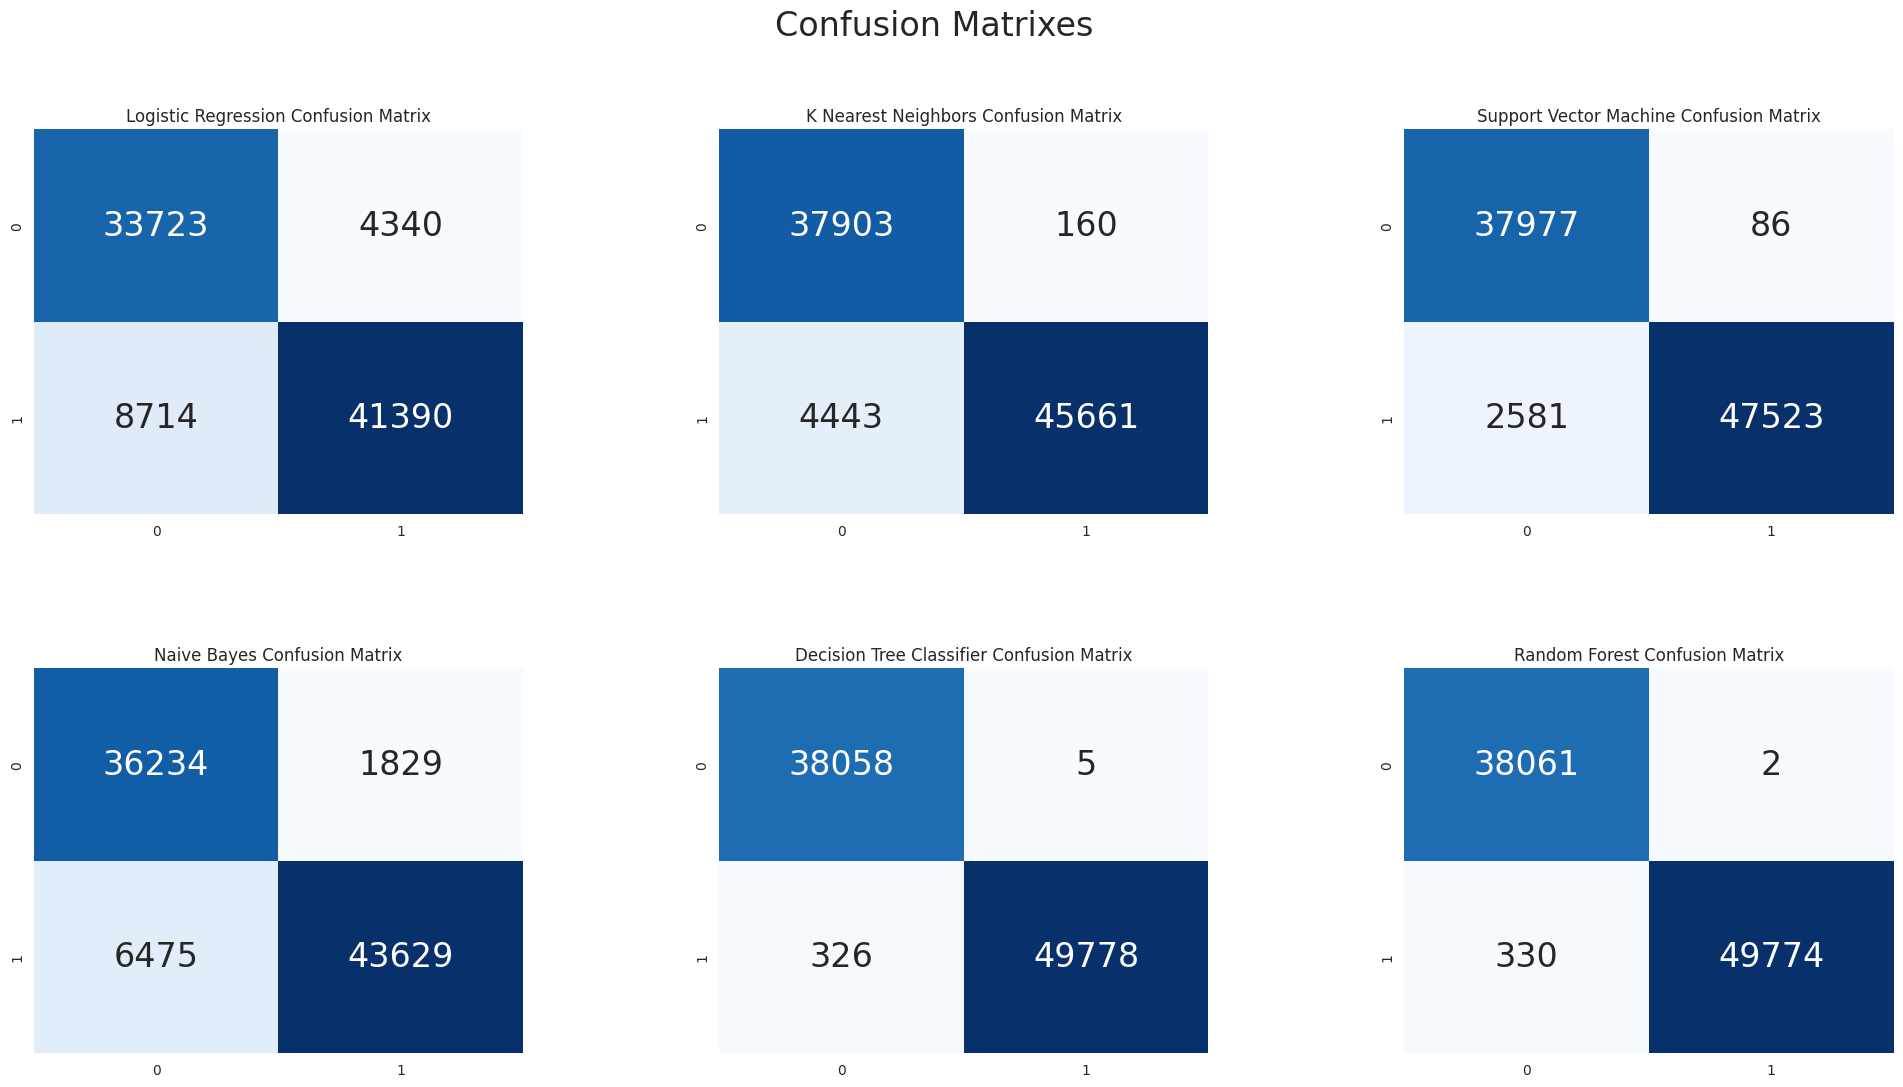

In [ ]:
models = [
    ("Logistic Regression", cm_lr),
    ("K Nearest Neighbors", cm_best_knn),
    ("Support Vector Machine", cm_svc),
    ("Naive Bayes", cm_nb),
    ("Decision Tree Classifier", cm_dtc),
    ("Random Forest", cm_rf)
]

plt.figure(figsize=(24, 12))
plt.suptitle("Confusion Matrixes", fontsize=24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for i, (title, cm) in enumerate(models, 1):
    plt.subplot(2, 3, i)
    plt.title(f"{title} Confusion Matrix")
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

plt.show()


## prediction

In [ ]:
# Final test data
X_test_data = test_data.drop(columns=['Churn'], errors="ignore")
y_test_data = test_data['Churn']

In [ ]:
results = []

# Evaluate all trained models on test_data
for name, model in trained_models.items():

    # Prediction on test_data
    y_pred = model.predict(X_test_data)

    # Accuracy
    acc = accuracy_score(y_test_data, y_pred)

    results.append({
        "Algorithm": name,
        "Test Data Accuracy": acc
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Sort by best accuracy
results_df = results_df.sort_values(by="Test Data Accuracy", ascending=False)
print(results_df)

                Algorithm  Test Data Accuracy
0     Logistic Regression            0.600693
3    Gaussian Naive Bayes            0.580980
1     K-Nearest Neighbors            0.551729
2  Support Vector Machine            0.535371
5           Random Forest            0.507814
4           Decision Tree            0.507658


##

## Saving Model

In [ ]:
import joblib
import sklearn

# Print sklearn version
print(f"Scikit-learn version when saving: {sklearn.__version__}")

# 1. Save the trained Logistic Regression model
best_model = trained_models["Logistic Regression"]
joblib.dump(best_model, "telco_churn_logreg_model.pkl")
print("Logistic Regression model saved successfully as telco_churn_logreg_model.pkl")

# 2. Save the fitted scaler
joblib.dump(scaler, "telco_churn_scaler.pkl")
print("Scaler saved successfully as telco_churn_scaler.pkl")

# 3. Save preprocessing (the encoders dictionary)
joblib.dump(encoders, "telco_churn_encoders.pkl")
print("Encoders saved successfully as telco_churn_encoders.pkl")




Scikit-learn version when saving: 1.6.1
Logistic Regression model saved successfully as telco_churn_logreg_model.pkl
Scaler saved successfully as telco_churn_scaler.pkl
Encoders saved successfully as telco_churn_encoders.pkl
